# Telco Customer Churn Prediction Project

**Author:** Alveena Khan  
**Date:** 2025-05-19

---

## Project Overview

This project aims to analyze the Telco customer dataset to predict customer churn using machine learning models. The goal is to build an accurate churn prediction model and deploy it as a user-friendly web app using Streamlit.

---

## Table of Contents
1. Data Loading  
2. Data Preprocessing  
3. Exploratory Data Analysis  
4. Model Building  
5. Model Evaluation  
6. Streamlit App Deployment


### Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Streamlit 
import streamlit as st

### Load Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [3]:
# Looking first few rows of Data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Explore and preprocess the data

In [4]:
df.shape

(7043, 21)

In [5]:
# Columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Describe

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Checking null values

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- No missing values found in the dataset.

### Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

- No duplicate values found in the dataset.

### Outliers

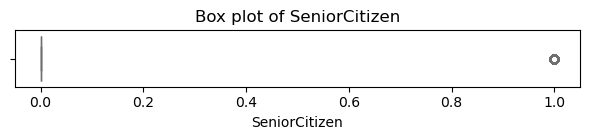

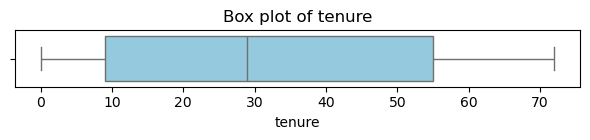

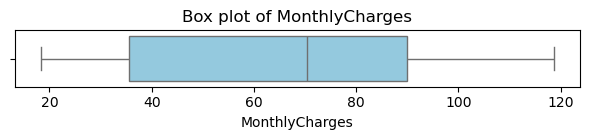

In [10]:
# Filter column that are int and float
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

- No significant outliers detected based on box plots.

### Data Types and Encoding

#### Checking all data types

In [11]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [12]:
# Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

Categorical Columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


### Exploratory Data Analysis

#### Target Variable(Churn)

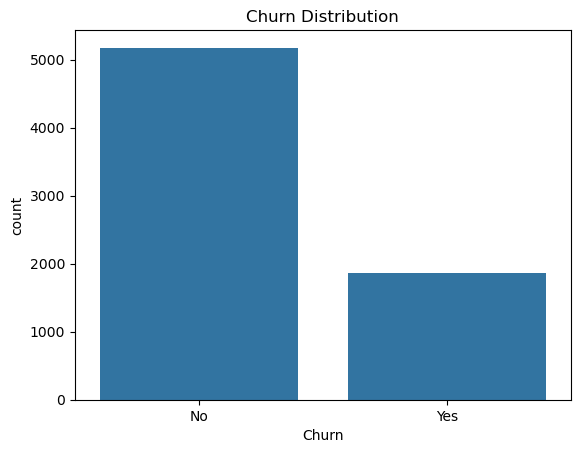

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [13]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

df['Churn'].value_counts(normalize=True)

#### Insight:
The dataset is imbalanced — a significantly higher number of customers have **not churned** compared to those who have.  
Approximately:
- **73% did not churn**
- **26% churned**

This imbalance may affect the performance of machine learning models, making them biased toward the majority class.  
We will address this issue during the modeling stage using **resampling techniques** or **class weighting**.

#### Tenure Analysis

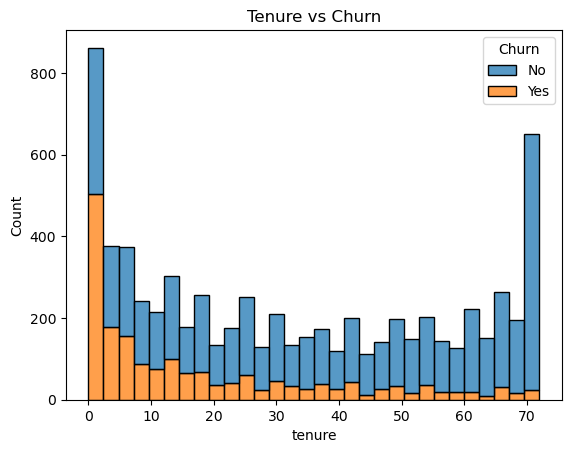

In [14]:
sns.histplot(x='tenure', data=df, hue='Churn', multiple='stack', bins=30)
plt.title('Tenure vs Churn')
plt.show()

#### Insight:
- Customers with **low tenure (0–12 months)** have a significantly higher churn rate compared to long-tenured customers.
- As tenure increases, **the number of churned customers decreases**, indicating that **longer-tenure customers are more loyal**.
- This suggests that **customer retention strategies should focus on the early months** of customer onboarding, where churn is highest.


#### Categorical Variables vs Churn

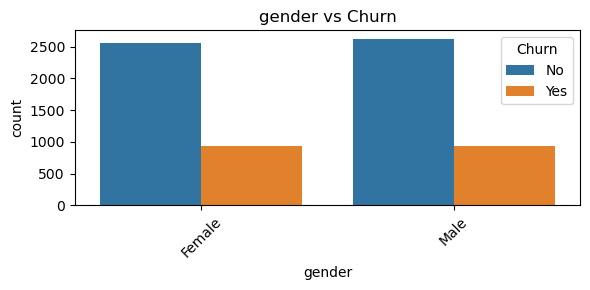

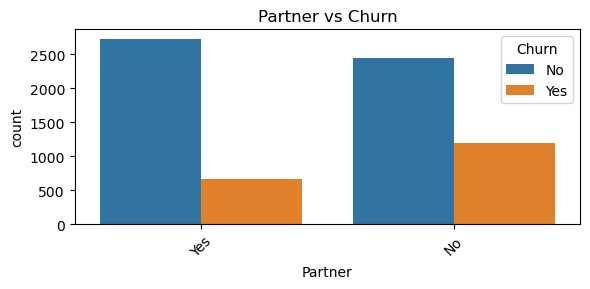

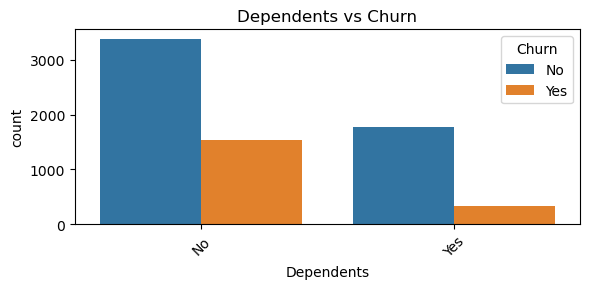

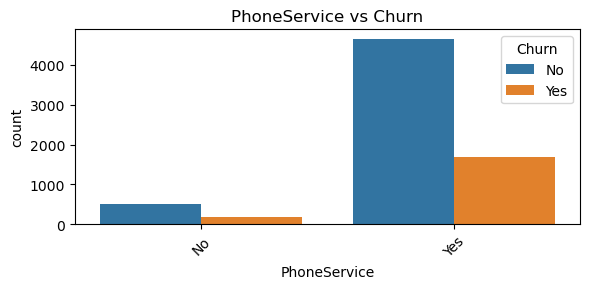

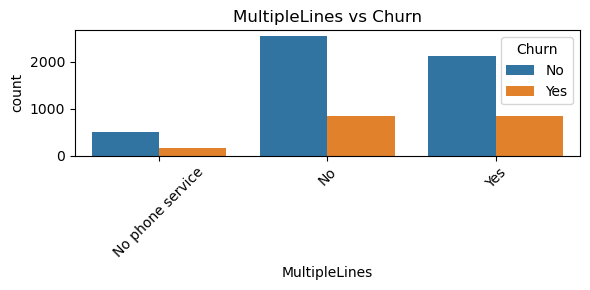

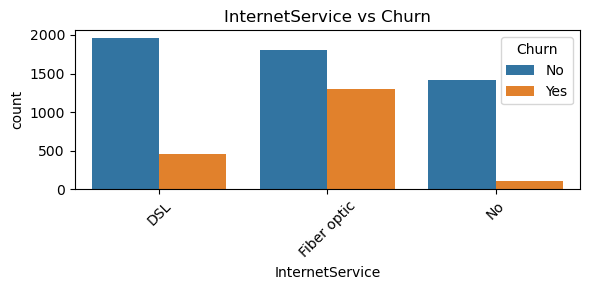

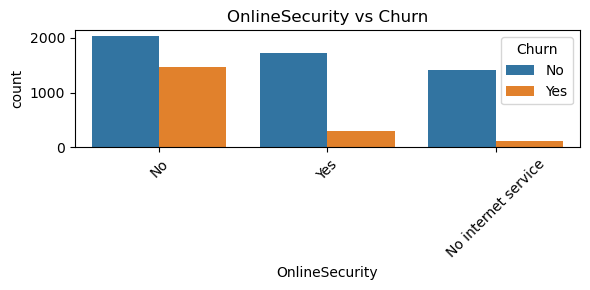

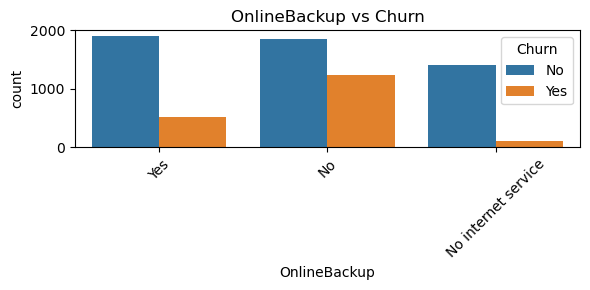

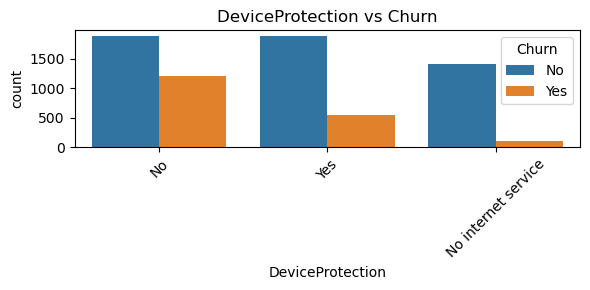

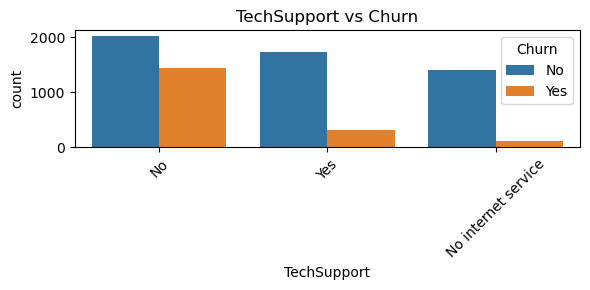

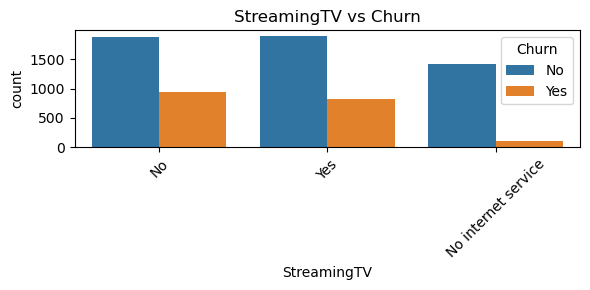

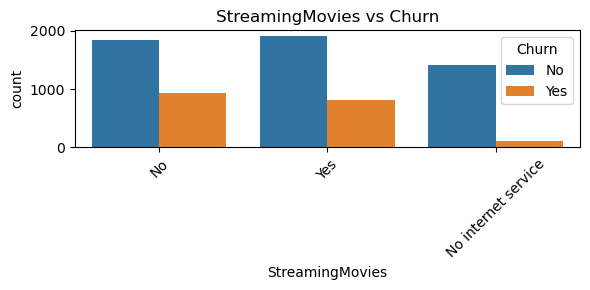

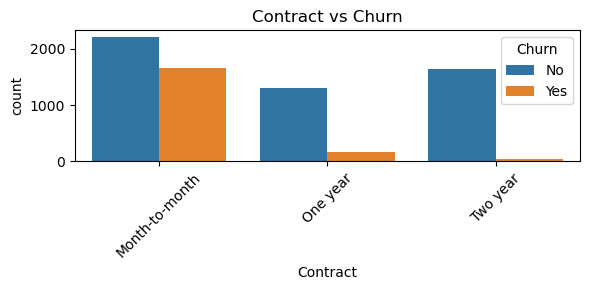

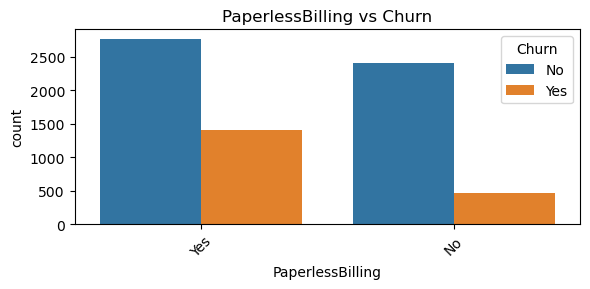

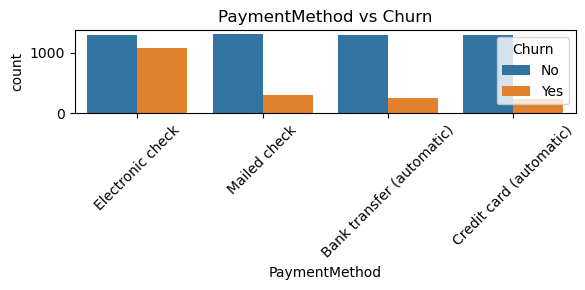

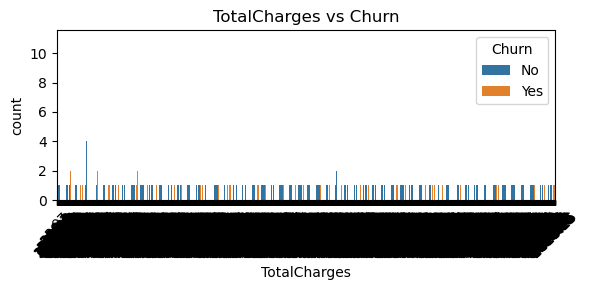

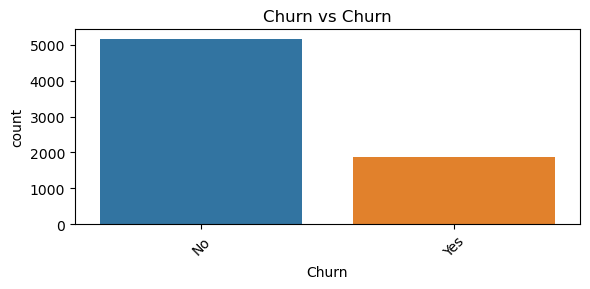

In [15]:
categorical_cols.remove('customerID')
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
    plt.show()

#### Insights

##### gender
- No significant difference in churn rates between male and female customers.

##### Partner
- Customers without partners tend to churn more than those with partners, suggesting family support might reduce churn.

##### Dependents
- Customers without dependents show slightly higher churn rates, indicating that family responsibilities might encourage staying.

##### PhoneService
- Churn rate is higher among customers without phone service, possibly due to less engagement or bundled service dissatisfaction.

##### MultipleLines
- Customers with no multiple lines or no phone service tend to have different churn patterns; those with multiple lines generally show lower churn.

##### InternetService
- Customers using Fiber optic internet churn significantly more than those with DSL or No internet service.

##### OnlineSecurity
- Customers without online security are more likely to churn, highlighting the importance of security features.

##### OnlineBackup
- Lack of online backup service correlates with higher churn.

##### DeviceProtection
- Customers without device protection tend to churn more, indicating value in protection plans.

##### TechSupport
- Absence of tech support correlates with higher churn, emphasizing its role in customer retention.

##### StreamingTV
- Customers without streaming TV have lower churn; streaming TV subscribers may churn more if unsatisfied.

##### StreamingMovies
- Similar to streaming TV, subscribers to streaming movies show higher churn rates.

##### Contract
- Month-to-month contracts show much higher churn compared to one-year or two-year contracts.

##### PaperlessBilling
- Customers using paperless billing tend to churn more than those using traditional billing.

##### PaymentMethod
- Customers paying by electronic check have the highest churn rates compared to other payment methods.

##### TotalCharges
- Lower total charges often correspond with higher churn, indicating newer or less engaged customers churn more.

##### Churn
- Target variable indicating if the customer has left (Yes) or stayed (No).



#### Numerical Variables vs Churn

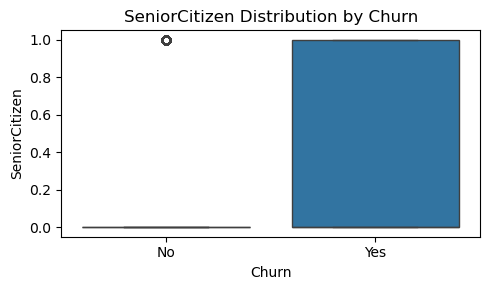

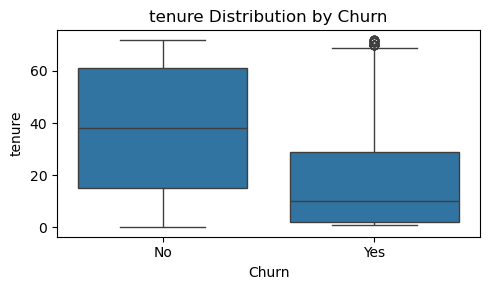

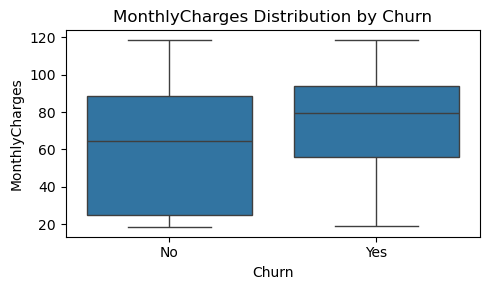

In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} Distribution by Churn')
    plt.tight_layout()
    plt.show()

#### Insights

##### Senior citizen
- Senior citizens (SeniorCitizen = 1) tend to have a higher churn rate compared to non-senior customers.
- This could indicate that older customers are more likely to leave the service.

##### tenure
- Customers who churn (Yes) tend to have lower tenure — meaning they stay fewer months before leaving. Customers with longer tenure mostly stay (No churn).

##### MonthlyCharges
- Customers who churn often have higher monthly charges compared to those who stay, suggesting price sensitivity.

#### Correlation Heatmap

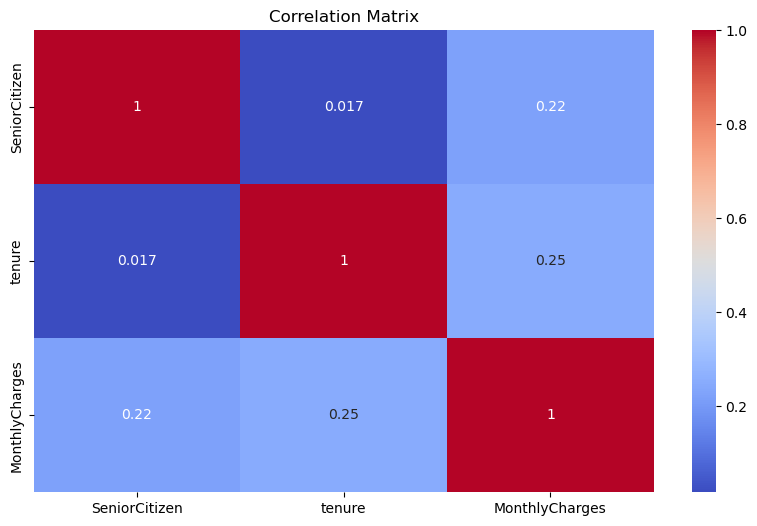

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Encoding Categorical variables

In [18]:
print(categorical_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


#### Encode the target column churn

In [19]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

#### Encode other categorical features

- For binary categorical columns (Yes/No), map them to 0/1 manually or use LabelEncoder.
- For multi-category columns, use one-hot encoding.

In [20]:
for col in categorical_cols:
    print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]


#### Binary mapping

In [21]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    df[col] = df[col].map({'Yes':1 , 'No':0})

In [22]:
df['gender'] = df['gender'].map({'Female':1 , 'Male':0})

#### One-hot Encoding for multiple categorical columns

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [24]:
print(df['TotalCharges'].isnull().sum())  

11


<Axes: xlabel='TotalCharges', ylabel='Count'>

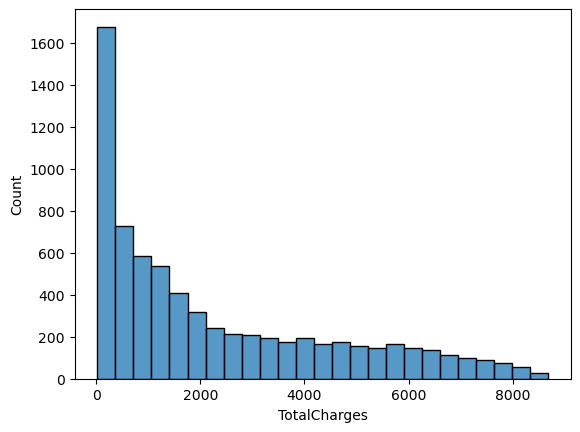

In [25]:
sns.histplot(df['TotalCharges'])

In [26]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_38968\2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [27]:
# Get all object/category columns
multi_cat_cols = df.select_dtypes(include='object').columns
multi_cat_cols = multi_cat_cols.drop(['customerID'])

In [28]:
# One-hot encode columns with more than 2 unique categories
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


In [29]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,84.80,1990.50,...,True,False,True,False,True,True,False,False,False,True
7039,2234-XADUH,1,0,1,1,72,1,1,103.20,7362.90,...,False,False,True,False,True,True,False,True,False,False
7040,4801-JZAZL,1,0,1,1,11,0,1,29.60,346.45,...,False,False,False,False,False,False,False,False,True,False
7041,8361-LTMKD,0,1,1,0,4,1,1,74.40,306.60,...,False,False,False,False,False,False,False,False,False,True


In [30]:
df.shape

(7043, 32)

In [31]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

#### Converting Boolean Columns to 0 and 1

In [32]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [33]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,84.80,1990.50,...,1,0,1,0,1,1,0,0,0,1
7039,2234-XADUH,1,0,1,1,72,1,1,103.20,7362.90,...,0,0,1,0,1,1,0,1,0,0
7040,4801-JZAZL,1,0,1,1,11,0,1,29.60,346.45,...,0,0,0,0,0,0,0,0,1,0
7041,8361-LTMKD,0,1,1,0,4,1,1,74.40,306.60,...,0,0,0,0,0,0,0,0,0,1


### Feature Engineering

#### Droping Customer ID column 

In [34]:
df = df.drop('customerID', axis=1)

### Scaling Numerical Features

In [35]:
# Select numeric columns (excluding target)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Optionally, exclude binary columns (already 0/1)
num_cols_to_scale = [col for col in num_cols if df[col].nunique() > 2]

print(num_cols_to_scale)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [36]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [37]:
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [38]:
df[cols_to_scale].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.406285e-17,-1.488074e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-9.991203e-01
25%,-9.516817e-01,-9.725399e-01,-8.298459e-01
50%,-1.372744e-01,1.857327e-01,-3.904632e-01
75%,9.214551e-01,8.338335e-01,6.642871e-01
max,1.613701e+00,1.794352e+00,2.826743e+00


### Balancing Imbalanced Target variable

#### Check for class imbalance

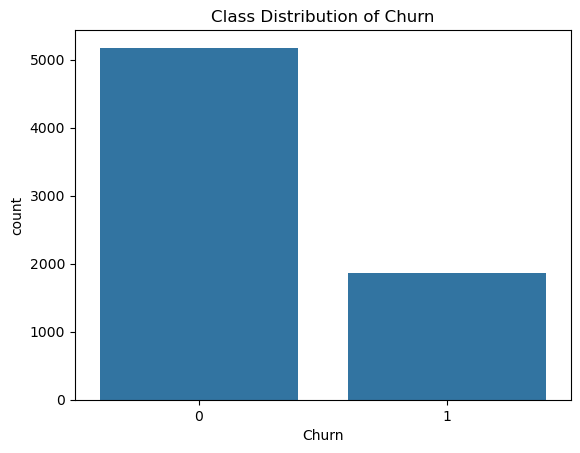

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [39]:
# Check class distribution in target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Class Distribution of Churn')
plt.show()

# Count values
print(df['Churn'].value_counts(normalize=True))  # Shows percentage

#### Split Data into Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Apply SMOTE to Training Data Only

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# check new distribution
print(y_train_bal.value_counts())

C:\Users\PMLS\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Churn
0    4139
1    4139
Name: count, dtype: int64


## Modeling

In this section, we compare three classification models: Logistic Regression, Random Forest, and XGBoost. All models are trained on the balanced training dataset obtained using SMOTE. We'll evaluate each model's performance on the original test set using accuracy, precision, recall, and F1-score.

### Import Models and metrics

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

- We'll compare 3 models – Logistic Regression (baseline), Random Forest (robust ensemble), and XGBoost (powerful gradient boosting).

### Initialize the models

In [44]:
# Create model instances
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

### Train the Models on Balanced Data

In [45]:
logreg.fit(X_train_bal, y_train_bal)
rf.fit(X_train_bal, y_train_bal)
xgb.fit(X_train_bal, y_train_bal)

C:\Users\PMLS\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Make Predictions on Test Set

In [46]:
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

### Evaluate Model Performance

In [47]:
print("🔹 Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("🔹 Random Forest:\n", classification_report(y_test, y_pred_rf))
print("🔹 XGBoost:\n", classification_report(y_test, y_pred_xgb))

🔹 Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      1035
           1       0.53      0.73      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

🔹 Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.55      0.63      0.59       374

    accuracy                           0.77      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409

🔹 XGBoost:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1035
           1       0.53      0.65      0.58       374

    accuracy                           0.75      1409
   macro avg       0.70      0.72      0.70      1409
weighted avg       0

Confusion Matrix for Logistic Regression


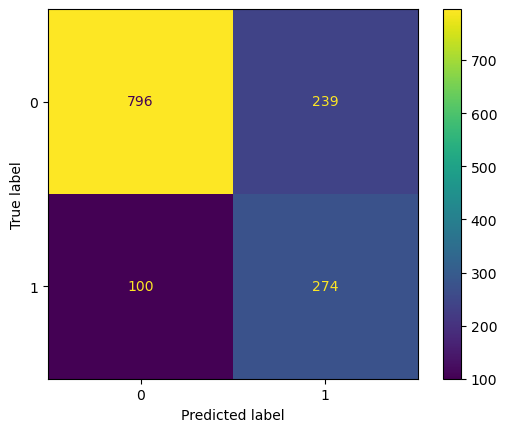

Confusion Matrix for Random Forest


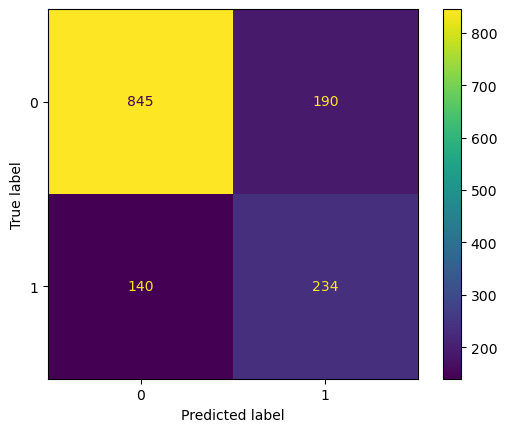

Confusion Matrix for XGBoost


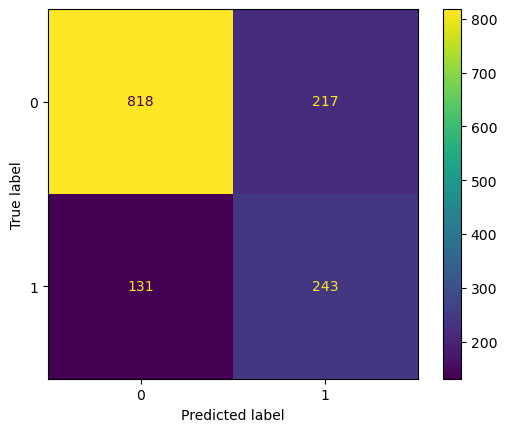

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": y_pred_logreg,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for name, y_pred in models.items():
    print(f"Confusion Matrix for {name}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

#### I selected Logistic Regression because:

- It is a simple and interpretable model, which makes it easier to explain the relationship between features and the target variable (e.g., churn).

- It performs well on balanced and moderately imbalanced datasets, especially after applying SMOTE to balance classes.

- It achieved a good balance between precision and recall in the evaluation metrics, which aligns with the project goal of correctly identifying positive cases (like customers likely to churn).

- Its coefficients provide insight into feature importance, useful for business decision-making.



###  Select the important features

In [49]:
print(X_train_bal.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [50]:
important_features = [
    'Contract_One year',
    'Contract_Two year',
    'tenure',
    'MonthlyCharges',
    'PaymentMethod_Electronic check',
    'InternetService_Fiber optic',
    'OnlineSecurity_Yes',
    'TechSupport_Yes'
]

# Select only important features for training and testing
X_train_important = X_train_bal[important_features]
X_test_important = X_test[important_features]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define parameter grid for regularization strength
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

logreg = LogisticRegression(random_state=42, max_iter=1000)

# Use GridSearchCV on the important features ONLY
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid.fit(X_train_important, y_train_bal)  # <-- Fix here

print("Best C:", grid.best_params_['C'])

# Use the best model from grid search
best_logreg = grid.best_estimator_

# Fit logistic regression with the best C on important features
best_logreg.fit(X_train_important, y_train_bal)

# Predict on test data important features
y_pred = best_logreg.predict(X_test_important)

# Print classification report
print(classification_report(y_test, y_pred))


Best C: 1
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1035
           1       0.50      0.76      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409



#### Model Selection:
- I chose Logistic Regression with regularization parameter C=1 for its balance of interpretability and performance.

#### Performance:
- The model achieved an accuracy of 76%, with an ROC-AUC score of 0.83, indicating good predictive power. It shows strong precision and recall on the majority class and acceptable recall on the minority class, important for identifying positive cases.

#### Handling Imbalanced Data:
- SMOTE was applied to balance the training data, helping the model better learn minority class patterns, improving recall from earlier iterations.

#### Confusion Matrix Insight:
- The model correctly identifies 73% of positive cases (recall), which is crucial for minimizing false negatives in this domain.

### Save trained Logistic Regression model

In [51]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(C=1, random_state=42)
logistic_model.fit(X_train_bal, y_train_bal)  

LogisticRegression(C=1, random_state=42)

In [52]:
import pickle

# Save the best logistic regression model to a file
with open('best_logreg_model.pkl', 'wb') as file:
    pickle.dump(best_logreg, file)

print("Model saved successfully!")


Model saved successfully!


### Build a Simple Interface Using Streamlit
- Now, I want to create a small app to input new data and get predictions. Streamlit lets to do that easily.